<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

Round: 10 3 1 Fitnesses:  13.6
Round: 10 3 2 Fitnesses:  15.6
Round: 10 3 3 Fitnesses:  12.4
Round: 10 3 4 Fitnesses:  10.4
Round: 10 3 5 Fitnesses:  13.2
Round: 10 3 6 Fitnesses:  16.9
Round: 10 3 7 Fitnesses:  13.0
Round: 10 3 8 Fitnesses:  12.3
Round: 10 3 9 Fitnesses:  10.9
Round: 10 3 10 Fitnesses:  14.6
Round: 10 3 11 Fitnesses:  13.6
Round: 10 3 12 Fitnesses:  13.5
Round: 10 3 13 Fitnesses:  9.6
Round: 10 3 14 Fitnesses:  12.2
Round: 10 3 15 Fitnesses:  15.7
Round: 10 3 16 Fitnesses:  12.4
Round: 10 3 17 Fitnesses:  14.1
Round: 10 3 18 Fitnesses:  10.7
Round: 10 3 19 Fitnesses:  12.0
Round: 10 4 1 Fitnesses:  13.0
Round: 10 4 2 Fitnesses:  15.4
Round: 10 4 3 Fitnesses:  16.2
Round: 10 4 4 Fitnesses:  10.1
Round: 10 4 5 Fitnesses:  13.0
Round: 10 4 6 Fitnesses:  12.8
Round: 10 4 7 Fitnesses:  10.0
Round: 10 4 8 Fitnesses:  13.4
Round: 10 4 9 Fitnesses:  13.2
Round: 10 4 10 Fitnesses:  12.8
Round: 10 4 11 Fitnesses:  12.7
Round: 10 4 12 Fitnesses:  16.8
Round: 10 4 13 Fitnesses:  

Round: 30 4 7 Fitnesses:  15.2
Round: 30 4 8 Fitnesses:  16.2
Round: 30 4 9 Fitnesses:  13.466666666666667
Round: 30 4 10 Fitnesses:  16.1
Round: 30 4 11 Fitnesses:  14.233333333333333
Round: 30 4 12 Fitnesses:  16.433333333333334
Round: 30 4 13 Fitnesses:  14.233333333333333
Round: 30 4 14 Fitnesses:  13.033333333333333
Round: 30 4 15 Fitnesses:  15.1
Round: 30 4 16 Fitnesses:  13.933333333333334
Round: 30 4 17 Fitnesses:  14.866666666666667
Round: 30 4 18 Fitnesses:  14.0
Round: 30 4 19 Fitnesses:  14.233333333333333
Round: 30 5 1 Fitnesses:  16.966666666666665
Round: 30 5 2 Fitnesses:  13.633333333333333
Round: 30 5 3 Fitnesses:  15.433333333333334
Round: 30 5 4 Fitnesses:  16.4
Round: 30 5 5 Fitnesses:  13.9
Round: 30 5 6 Fitnesses:  16.833333333333332
Round: 30 5 7 Fitnesses:  15.333333333333334
Round: 30 5 8 Fitnesses:  14.466666666666667
Round: 30 5 9 Fitnesses:  13.8
Round: 30 5 10 Fitnesses:  15.733333333333333
Round: 30 5 11 Fitnesses:  15.333333333333334
Round: 30 5 12 Fitne

Round: 50 4 6 Fitnesses:  14.42
Round: 50 4 7 Fitnesses:  14.38
Round: 50 4 8 Fitnesses:  15.96
Round: 50 4 9 Fitnesses:  15.4
Round: 50 4 10 Fitnesses:  14.22
Round: 50 4 11 Fitnesses:  15.9
Round: 50 4 12 Fitnesses:  15.92
Round: 50 4 13 Fitnesses:  16.36
Round: 50 4 14 Fitnesses:  16.56
Round: 50 4 15 Fitnesses:  16.22
Round: 50 4 16 Fitnesses:  14.68
Round: 50 4 17 Fitnesses:  15.46
Round: 50 4 18 Fitnesses:  16.02
Round: 50 4 19 Fitnesses:  15.4
Round: 50 5 1 Fitnesses:  16.16
Round: 50 5 2 Fitnesses:  17.98
Round: 50 5 3 Fitnesses:  16.4
Round: 50 5 4 Fitnesses:  16.6
Round: 50 5 5 Fitnesses:  15.1
Round: 50 5 6 Fitnesses:  15.82
Round: 50 5 7 Fitnesses:  14.28
Round: 50 5 8 Fitnesses:  15.42
Round: 50 5 9 Fitnesses:  15.78
Round: 50 5 10 Fitnesses:  15.64
Round: 50 5 11 Fitnesses:  14.76
Round: 50 5 12 Fitnesses:  15.66
Round: 50 5 13 Fitnesses:  15.54
Round: 50 5 14 Fitnesses:  16.9
Round: 50 5 15 Fitnesses:  15.24
Round: 50 5 16 Fitnesses:  15.26
Round: 50 5 17 Fitnesses:  13.

Round: 70 3 14 Fitnesses:  14.9
Round: 70 3 15 Fitnesses:  14.485714285714286
Round: 70 3 16 Fitnesses:  15.014285714285714
Round: 70 3 17 Fitnesses:  15.571428571428571
Round: 70 3 18 Fitnesses:  16.071428571428573
Round: 70 3 19 Fitnesses:  15.142857142857142
Round: 70 4 1 Fitnesses:  17.742857142857144
Round: 70 4 2 Fitnesses:  16.285714285714285
Round: 70 4 3 Fitnesses:  15.371428571428572
Round: 70 4 4 Fitnesses:  15.785714285714286
Round: 70 4 5 Fitnesses:  14.82857142857143
Round: 70 4 6 Fitnesses:  16.214285714285715
Round: 70 4 7 Fitnesses:  17.228571428571428
Round: 70 4 8 Fitnesses:  16.62857142857143
Round: 70 4 9 Fitnesses:  15.757142857142858
Round: 70 4 10 Fitnesses:  15.028571428571428
Round: 70 4 11 Fitnesses:  15.142857142857142
Round: 70 4 12 Fitnesses:  17.085714285714285
Round: 70 4 13 Fitnesses:  16.057142857142857
Round: 70 4 14 Fitnesses:  14.157142857142857
Round: 70 4 15 Fitnesses:  15.114285714285714
Round: 70 4 16 Fitnesses:  16.385714285714286
Round: 70 4 1

Round: 80 8 19 Fitnesses:  15.625
Round: 90 3 1 Fitnesses:  16.455555555555556
Round: 90 3 2 Fitnesses:  15.366666666666667
Round: 90 3 3 Fitnesses:  15.855555555555556
Round: 90 3 4 Fitnesses:  15.088888888888889
Round: 90 3 5 Fitnesses:  16.177777777777777
Round: 90 3 6 Fitnesses:  15.677777777777777
Round: 90 3 7 Fitnesses:  15.077777777777778
Round: 90 3 8 Fitnesses:  15.411111111111111
Round: 90 3 9 Fitnesses:  15.633333333333333
Round: 90 3 10 Fitnesses:  16.133333333333333
Round: 90 3 11 Fitnesses:  16.133333333333333
Round: 90 3 12 Fitnesses:  16.166666666666668
Round: 90 3 13 Fitnesses:  15.655555555555555
Round: 90 3 14 Fitnesses:  15.133333333333333
Round: 90 3 15 Fitnesses:  14.466666666666667
Round: 90 3 16 Fitnesses:  15.844444444444445
Round: 90 3 17 Fitnesses:  15.522222222222222
Round: 90 3 18 Fitnesses:  16.2
Round: 90 3 19 Fitnesses:  15.88888888888889
Round: 90 4 1 Fitnesses:  15.844444444444445
Round: 90 4 2 Fitnesses:  15.944444444444445
Round: 90 4 3 Fitnesses:  

Round: 100 8 1 Fitnesses:  16.21
Round: 100 8 2 Fitnesses:  16.9
Round: 100 8 3 Fitnesses:  16.47
Round: 100 8 4 Fitnesses:  15.76
Round: 100 8 5 Fitnesses:  15.23
Round: 100 8 6 Fitnesses:  14.91
Round: 100 8 7 Fitnesses:  16.38
Round: 100 8 8 Fitnesses:  16.89
Round: 100 8 9 Fitnesses:  16.33
Round: 100 8 10 Fitnesses:  16.75
Round: 100 8 11 Fitnesses:  16.43
Round: 100 8 12 Fitnesses:  14.5
Round: 100 8 13 Fitnesses:  17.93
Round: 100 8 14 Fitnesses:  17.39
Round: 100 8 15 Fitnesses:  15.67
Round: 100 8 16 Fitnesses:  16.53
Round: 100 8 17 Fitnesses:  16.36
Round: 100 8 18 Fitnesses:  16.09
Round: 100 8 19 Fitnesses:  16.92
[ 10.  10.  10. ... 100. 100. 100.]


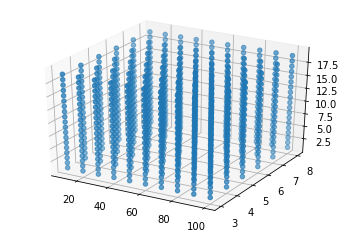

In [7]:
def create_population(size):
    # Create the initial population
    A = ['0', '1']
    population = []
    for i in range(size):
        # Make a random binary string with length 20
        population.append(''.join((random.choice(A)) for j in range(20)))
#     print(population)
    return(population)

# population = create_population()[:10]
    
def find_fitness(population):
    # Calculate fitness of chromosomes
    fitnesses = []
    for chromosome in population:
        my_sum = 0
        for i in chromosome:
            if i == '1':
                my_sum += 1
        fitnesses.append(my_sum)
#     print("fitnesses are ############", fitnesses)
    return(fitnesses)
        
# print(find_fitness(create_population()))

def proportional_selection(population):
    # Select chromosomes to pass to next population proportionally to their fitness
    # Returns tuples of parents indexes
    weights = find_fitness(population)
#     print(weights)
    weights_normalized = [x / sum(weights) for x in weights]
#     print(sum(weights_normalized))
    indexes = []
    for j in range(len(population)):
        index = []
        for i in range(2):
            index.append(np.random.choice(range(len(population)), p=weights_normalized))
        indexes.append(index)

    return(indexes)
    
# proportional_selection(create_population())
    
def crossover(population, indexes, p):
    # Apply crossover to population
    if (p <= 1):
        p = p * 100
    new_population = []
    for pair in indexes:
        c1 = population[pair[0]]
        c2 = population[pair[1]]
        if (random.randrange(0,100) < p):
#             print('# Crossover!')
            point = random.randrange(0, len(c1) + 1)
            child = ''.join(c1[:point])
            child += c2[point:]
            new_population.append(child)
        else:
            new_population.append(population[pair[random.randrange(0, 2)]])
    return(new_population)

# crossover('00000', '11111', 100)
# print(crossover(population, proportional_selection(population)
# , 80))

def my_invert(char):
    if char == '0':
        return('1')
    else:
        return('0')

def mutation(population, p):
    # Apply mutation to population
    if (p <= 1):
        p = p * 100
    mutated_population = []
    for chromosome in population:
        if (random.randrange(0,100) < p):
            # Mutation!
            index = random.randrange(0, len(chromosome))
            new_chromosome = ''.join(chromosome[:index])
            new_chromosome += my_invert(chromosome[index])
            new_chromosome += chromosome[index + 1:]
            mutated_population.append(new_chromosome)
        else:
            mutated_population.append(chromosome)
    return(mutated_population)

def genetic_algorithm(population_size, crossover_probability, mutation_probability, generations):
    # Main genetic algorithm
#     print('hi')
    population = create_population(population_size)
    for i in range(0, generations):
        indexes = proportional_selection(population)
        new_population = crossover(population, indexes, p=crossover_probability)
        new_population = mutation(new_population, p=mutation_probability)
        population = new_population
    this_fitness_mean = np.array(find_fitness(population)).mean()
    print("Fitnesses: ", this_fitness_mean)
    return(this_fitness_mean)
    
    
# population 10-100
# crossover 0.3-0.9
# mutation 0.01-0.2
def run(generations):
#     print("Hell!")
    results = []
    for population_size in range(10, 110, 10):
        for crossover_probability in range(3, 9, 1):
            for mutation_probability in range(1, 20, 1):
                print("Round:", population_size, crossover_probability, mutation_probability, end=' ')
                result = genetic_algorithm(population_size, crossover_probability / 10, mutation_probability / 100, generations)
                results.append([population_size, crossover_probability, mutation_probability, result])
    return(np.array(results))


def visualize_results(vf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(vf[:, 0])
    ax.scatter(vf[:,0], vf[:,1], vf[:,2])
    plt.show()
    
visualize_results(run(30))

### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [42]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [44]:
def create_population(G, population_size, chromosome_size):
    # Create the initial population
    population = []
    for i in range(population_size):
        chromosome = []
        for i in range(chromosome_size):
            chromosome.append(select_random_neighbor(G, i))
            
        population.append(chromosome)
        
    return population

def select_random_neighbor(G, node):
    temp = len(G[node])
    return list(G[node])[random.choice(temp)]

def find_fitness():
    # Calculate fitness of chromosomes
    pass

def proportional_selection():
    # Select chromosomes to pass to next population proportionally to their fitness
    pass

def crossover(population, indexes, p):
    # Apply crossover to population
        # Apply crossover to population
    if (p <= 1):
        p = p * 100
    new_population = []
    for pair in indexes:
        c1 = population[pair[0]]
        c2 = population[pair[1]]
        if (random.randrange(0,100) < p):
#             print('# Crossover!')
            point = random.randrange(0, len(c1) + 1)
            child = ''.join(c1[:point])
            child += c2[point:]
            new_population.append(child)
        else:
            new_population.append(population[pair[random.randrange(0, 2)]])
    return(new_population)


def mutation(population):
    # Apply mutation to population
    A = ['0', '1']
    for i in range(len(population)):
        mask = [(random.choice(A)) for j in range(20)]
        print(mask)
    return()
   
mutation(create_population(football, 10, 10))

def genetic_algorithm():
    # Main genetic algorithm
    pass

TypeError: object of type 'int' has no len()

In [ ]:
# Run the genetic algorithm for different values of the requested parameters


In [ ]:
# modularity for GA community detection algorithm 
def compute_modularity(G,G_results):
    pass


#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου ανάλογα με τις τιμές των παραμέτρων

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

In [ ]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.performance(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [ ]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.performance(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [ ]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.performance(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

### Compare best modularity scores for all algorithms

In [ ]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(,))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r"%(,))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(,))

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους